In [84]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from astropy.stats import sigma_clip
from astropy.stats import biweight_midvariance
from astropy.stats import mad_std
import matplotlib.mlab as mlab

%matplotlib inline 
#%matplotlib notebook
%config InlineBackend.figure_format = 'retina'


(2048, 576)


/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:39: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:45: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


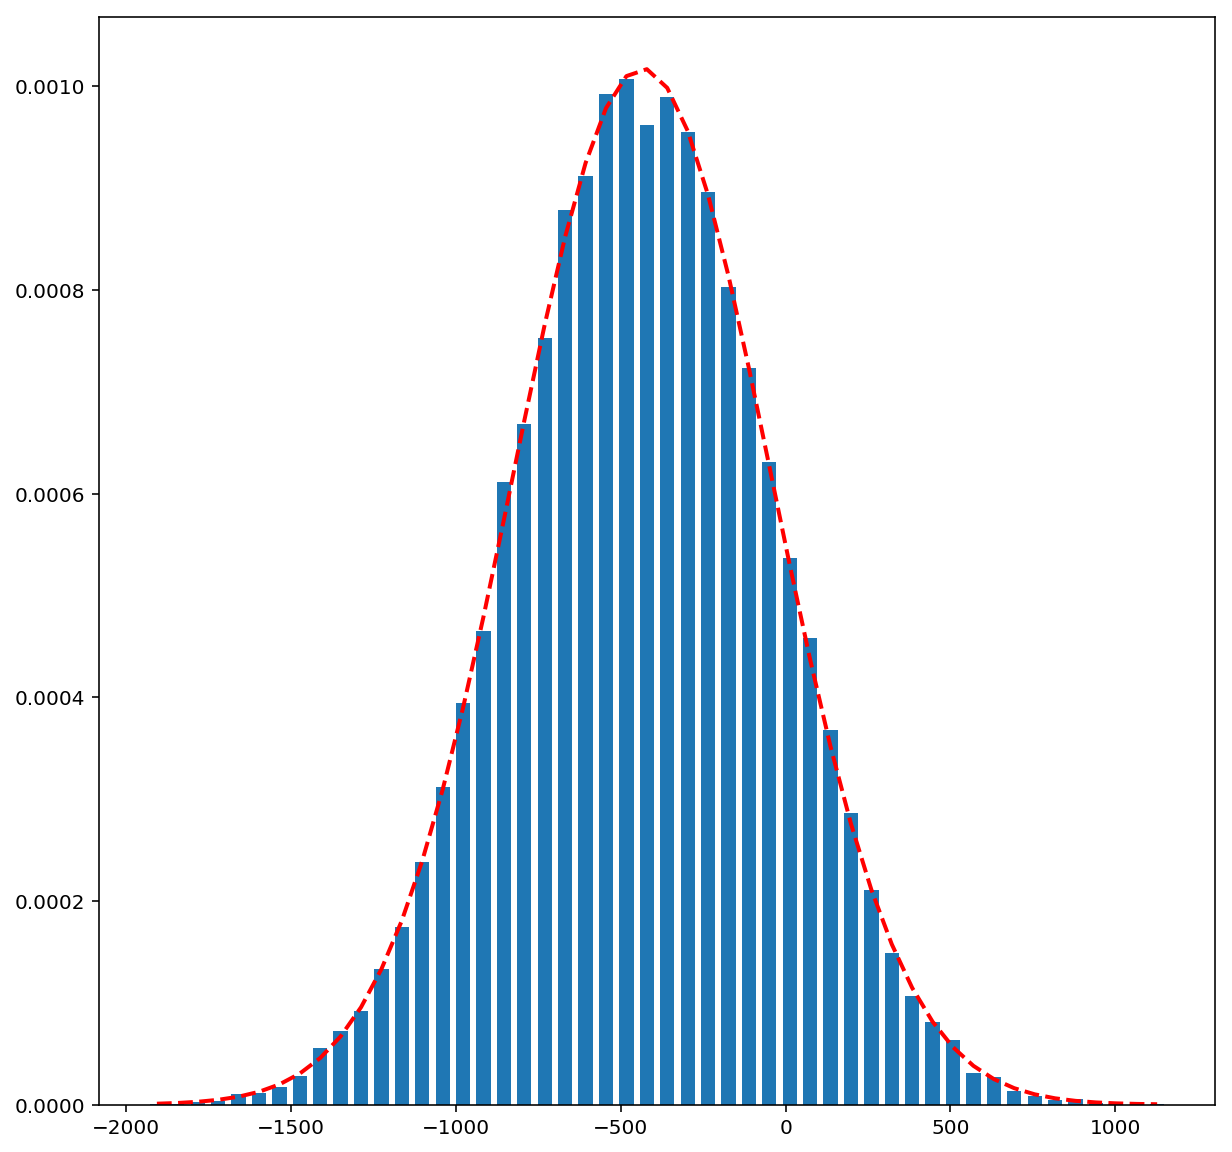

79288.7666 76844.52016714874
76844.52016714874
76844.52016714874
78546.8297760516
77764.71217100476


In [86]:
date="20190418"
xmin=150
xmax=350
ymin=150
ymax=350
amp=6

expnum=657
exposure=(str(expnum).zfill(6))
filename="/project/bstalder/comcam/raw/"+date+"/CC_C_"+date+"_"+exposure+"/CC_C_"+date+"_"+exposure+"_R22_S11.fits"
bias=fits.open(filename)
#print(repr(bias[0].header))

expnum=658
exposure=(str(expnum).zfill(6))
filename="/project/bstalder/comcam/raw/"+date+"/CC_C_"+date+"_"+exposure+"/CC_C_"+date+"_"+exposure+"_R22_S11.fits"
flat1=fits.open(filename)

expnum=659
exposure=(str(expnum).zfill(6))
filename="/project/bstalder/comcam/raw/"+date+"/CC_C_"+date+"_"+exposure+"/CC_C_"+date+"_"+exposure+"_R22_S11.fits"
flat2=fits.open(filename)
print(bias[amp].data.shape)
biasamp=bias[amp].data[ymin:ymax,xmin:xmax]
flat1amp=flat1[amp].data[ymin:ymax,xmin:xmax]
flat2amp=flat2[amp].data[ymin:ymax,xmin:xmax]

plt.rcParams['figure.figsize'] = [10, 10]
#plt.imshow(flat1amp-flat2amp)


filtered_data = sigma_clip(flat1amp-flat2amp, sigma=5, maxiters=5)
signal=np.mean( flat1amp-biasamp)
variance=0.5*np.std((flat1amp-flat2amp),dtype=np.float64)**2
variancefiltered=0.5*np.std( (filtered_data),dtype=np.float64)**2
robust_variance=0.5*biweight_midvariance(flat1amp-flat2amp)
robust_variance_mad=0.5*mad_std(flat1amp-flat2amp)**2

hist,edges=np.histogram(flat1amp-flat2amp,bins=50,normed=1)
#hist,edges=np.histogram(filtered_data,bins=50,normed=1)
width=0.7 * (edges[1]-edges[0])
centers=(edges[:-1]+edges[1:])/2

(mu, sigma) = norm.fit(flat1amp-flat2amp)
y = mlab.normpdf( centers, mu, sigma)

plt.bar(centers,hist,width=width)
plt.plot(centers, y, 'r--', linewidth=2)

plt.show()
#print(flat1amp-flat2amp)
print(signal, variance)
print(variancefiltered)
print(0.5*sigma**2)
print(robust_variance)
print(robust_variance_mad)

bias.close()
flat1.close()
flat2.close()

In [94]:
date="20190418"
xmin=150
xmax=350
ymin=150
ymax=350
amp=6

signal = []
variance = []
sigmagaussfit = []
robust_variance = []
robust_variance_mad = []

for i in range(600,687,3):
#    print(i)
    biasnum=str(i).zfill(6)
    flat1num=str(i+1).zfill(6)
    flat2num=str(i+2).zfill(6)
    biasfile="/project/bstalder/comcam/raw/"+date+"/CC_C_"+date+"_"+biasnum+"/CC_C_"+date+"_"+biasnum+"_R22_S11.fits"
    flat1file="/project/bstalder/comcam/raw/"+date+"/CC_C_"+date+"_"+flat1num+"/CC_C_"+date+"_"+flat1num+"_R22_S11.fits"
    flat2file="/project/bstalder/comcam/raw/"+date+"/CC_C_"+date+"_"+flat2num+"/CC_C_"+date+"_"+flat2num+"_R22_S11.fits"
    with fits.open(biasfile) as bias:
        biasamp=bias[amp].data[ymin:ymax,xmin:xmax]
    with fits.open(flat1file) as flat1:
        flat1amp=flat1[amp].data[ymin:ymax,xmin:xmax]
#        print(flat1[0].header['EXPTIME'])
    with fits.open(flat2file) as flat2:
        flat2amp=flat2[amp].data[ymin:ymax,xmin:xmax]
    
    signal.append(np.mean( flat1amp-biasamp ))
    variance.append(0.5*np.std( (flat1amp-flat2amp))**2)
    (mu, sigma) = norm.fit(flat1amp-flat2amp)
    sigmagaussfit.append(0.5*(sigma)**2)
    robust_variance.append(0.5*biweight_midvariance((flat1amp-flat2amp)))
    robust_variance_mad.append(0.5*mad_std((flat1amp-flat2amp))**2)
    

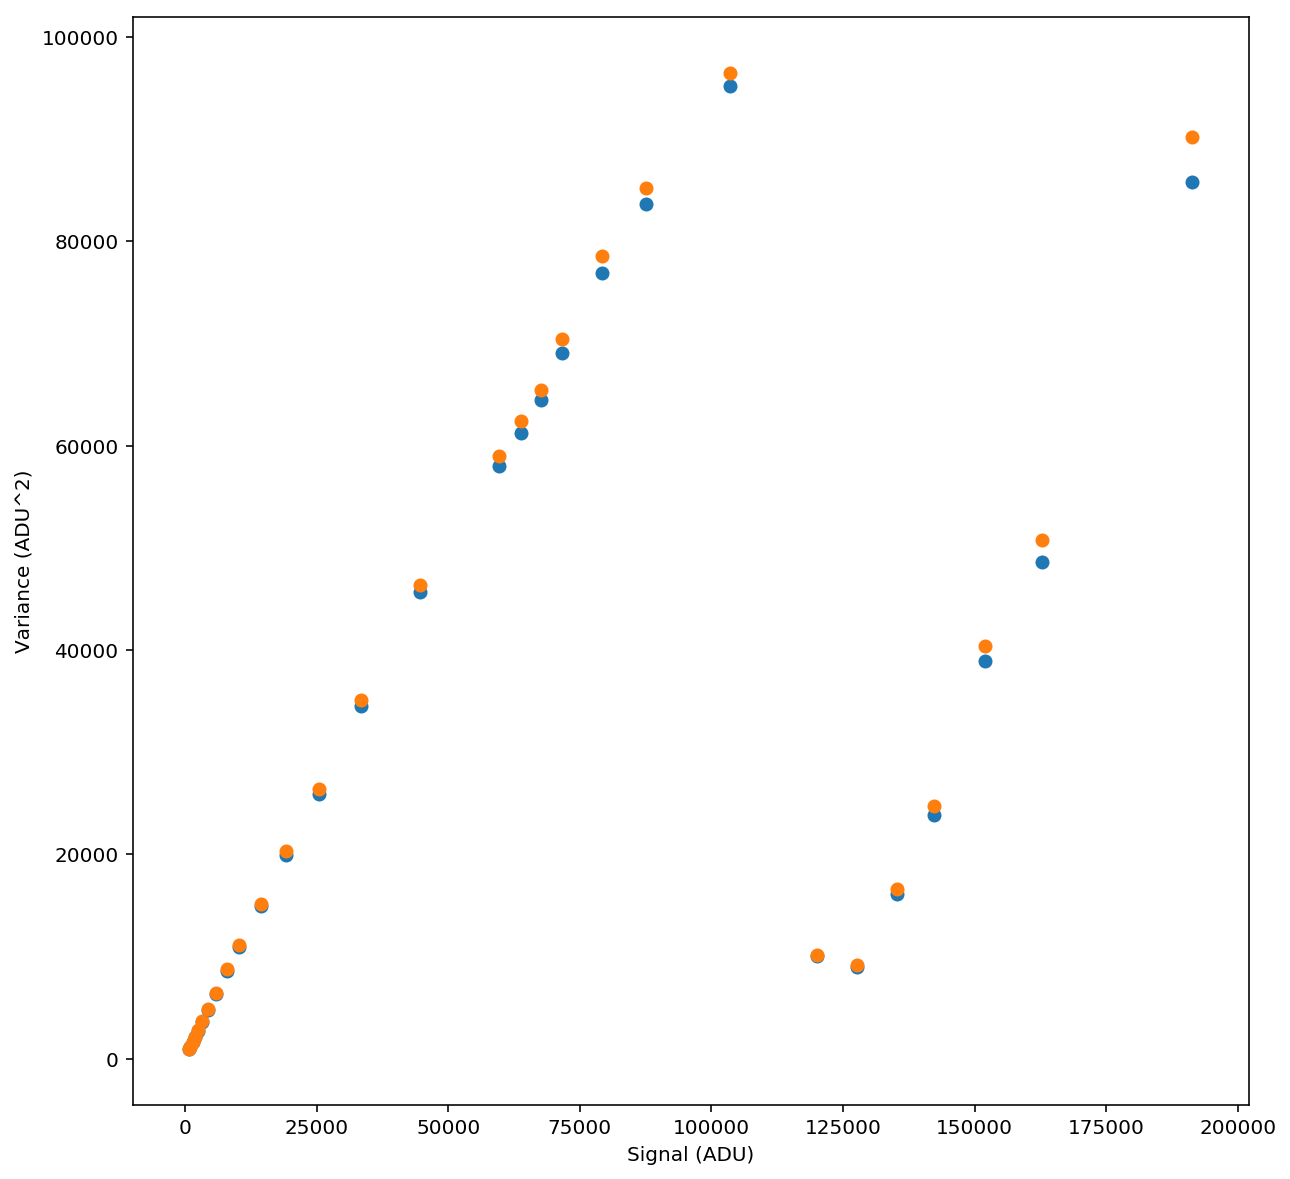

In [97]:
plt.figure()
plt.scatter(signal, variance)
#plt.scatter(signal,sigmafit)
plt.scatter(signal,robust_variance)
#plt.scatter(signal,robust_variance_mad)
plt.xlabel('Signal (ADU)')
plt.ylabel('Variance (ADU^2)')
#plt.axis([0,180000,0,1250000])
plt.show()

In [25]:
for i in range(0,len(signal)-1):
    print(600+3*i,signal[i],variance[i],sigmafit[i]**2)

600 807.545175 1332.2552502490503 1840.1113970775
603 1044.070125 1672.7068835948446 2356.0795527600003
606 1443.129675 2268.1143522317593 3215.7618979599997
609 1906.556525 2964.9049464394298 4197.4637118593755
612 2550.5833 3948.144975076143 5517.52804279
615 3307.55885 5274.201188882181 7243.780283344376
618 4432.31005 6757.403313677799 9539.2318134775
621 5971.294725 12899.985524300884 12686.83163324
624 7958.17065 13156.4575552296 17282.7603494775
627 10318.30195 18039.783611290262 21859.056748624378
630 14369.807475 23562.86558263502 29899.452150240002
633 19181.51555 28344.581276687808 39963.25531524437
636 25367.406225 56955.24756641205 51904.31632359
639 33427.34675 52098.8456882525 69122.0624821775
642 44640.930175 68264.16312982155 91248.6134948744
645 59639.245675 98816.19304305488 115958.31688892437
648 63847.333475 87257.56690232857 122522.68275119438
651 67604.3675 109421.44667155962 128926.96542784439
654 71675.713725 102455.87167848372 138107.36019374995
657 79288.7666